#Predicting the result of a game between Team 1 and Team 2

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

#1. Defining the Question

##a) Specifying the Question

To predict the results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly

##b) Defining the Metric of success

To be able to create a suitable model that predicts the number of goals a team playing in a tournament will score using polynomial or logistic regression 

##c) Understanding the context

There are two datasets available for this project; results and fifa_ranking. 
Results dataset tells whether a team played as an away team or home team, the scores, type of tournament and the country the match was played in.
The FIFA ranking dataset shows the rankings of different Countries by points and ranking dates.

#d) Recording the experimental design

i) Perform EDA and any necessary feature engineering 

ii) Check for multicollinearity

iii) Model building

iv) Cross-validation of the model

v) Compute RMSE

vi) Create residual plots for the models, and assess heteroscedasticity of the 
models using Bartlett’s test

vii) Perform appropriate regressions on the data including the justification for this

viii) Challenge the solution by providing insights on how there can be any improvements.

#Importing our libraries

In [179]:
#Importing pandas libraries will be used for data manipulation and data visualization

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
#importing sklearn libraries that will be used for regressin and predictions

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


#Loading our datasets

In [181]:
# We load the csv files for the fifa ranking dataset and the results dataset

fifa = pd.read_csv('fifa_ranking.csv')
res = pd.read_csv('results.csv')

Previewing the datasets



In [182]:
# previewing the fifa ranking dataset

fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [183]:
# previewing columns
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [184]:
# previewing the results dataset

res.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [185]:
# previewing columns

res.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

# Data Exploration

Checking the number of records for each dataset. This will show us the size of our datasets.

In [186]:
# Checking the number of records of each dataset 

print(fifa.shape)
print(res.shape)

# the fifa ranking datasethas 57,793 rows and 16 columns
# the results dataset has 40,839 rows and 9 columns 

(57793, 16)
(40839, 9)


In [187]:
# Checking for the information of each dataset

print(fifa.info())
print("**********************************************************")
print(res.info())

# The data types are all correct except for the rank_date column in the fifa ranking dataset 
# and the date column in the results date column 
# these should be in date dtype
# we will convert them during data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

We describe each dataset to get the general summary statistics.

In [188]:
# Describing our datasets

print(fifa.describe())
print("**************************************************************************************")
print(res.describe())

               rank  total_points  previous_points   rank_change  \
count  57793.000000  57793.000000     57793.000000  57793.000000   
mean     101.628086    122.068637       332.302926     -0.009897   
std       58.618424    260.426863       302.872948      5.804309   
min        1.000000      0.000000         0.000000    -72.000000   
25%       51.000000      0.000000        56.000000     -2.000000   
50%      101.000000      0.000000       272.000000      0.000000   
75%      152.000000     92.790000       525.000000      1.000000   
max      209.000000   1775.030000      1920.000000     92.000000   

       cur_year_avg  cur_year_avg_weighted  last_year_avg  \
count  57793.000000           57793.000000   57793.000000   
mean      61.798602              61.798602      61.004602   
std      138.014883             138.014883     137.688204   
min        0.000000               0.000000       0.000000   
25%        0.000000               0.000000       0.000000   
50%        0.000000  

# Data cleaning

In [189]:
# checking for missing values

print(fifa.isnull().sum())
print("*************************")
print(res.isnull().sum())

# there are no missing values in either of the datasets

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
*************************
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [190]:
#checking for duplicates

print(fifa.duplicated().sum())
print("*************************")
print(res.duplicated().sum())

# there are 37 duplicates in the fifa ranking dataset and 
# no duplicates in the results dataset

37
*************************
0


Managing Duplicates

In [191]:
fifa.shape

(57793, 16)

In [192]:
# deleting duplicates
fifa = fifa.drop_duplicates()

# previewing shape after dropping duplicates
print(fifa.shape)

print(57793 - 57756)
# 37 duplicaed records were dropped


(57756, 16)
37


Editting date related columns to date dtype

In [193]:
# change the rank_date column in fifa dataset from object to date_time data type
# change the date column in results from object to date_time data type

# Importing the date library

import datetime 

#convert date dtypes

fifa["rank_date"] = fifa["rank_date"].apply(pd.to_datetime) 
res["date"] = res["date"].apply(pd.to_datetime) 


Cardinality

In [194]:
# Checking the number of unique values in every column

# The number of Unique values in the fifa ranking dataset
print('Cardinality of fifa dataset columns:\n')
for i in fifa.columns:
  print(f'{i:<23} : {fifa[i].nunique()}')
  
# Number of unique values of the columns in the match results dataset
print('\nCardinatity of the results dataset columns:\n')
for j in res.columns:
  print(f'{j :<10} : {res[j].nunique()}')

Cardinality of fifa dataset columns:

rank                    : 209
country_full            : 216
country_abrv            : 216
total_points            : 11114
previous_points         : 1557
rank_change             : 121
cur_year_avg            : 7419
cur_year_avg_weighted   : 7419
last_year_avg           : 7473
last_year_avg_weighted  : 7001
two_year_ago_avg        : 7575
two_year_ago_weighted   : 6513
three_year_ago_avg      : 7628
three_year_ago_weighted : 5849
confederation           : 6
rank_date               : 286

Cardinatity of the results dataset columns:

date       : 15115
home_team  : 309
away_team  : 306
home_score : 26
away_score : 22
tournament : 109
city       : 1960
country    : 266
neutral    : 2


In [195]:
# checking if the conversion was successful

print(fifa.dtypes) 
print("********************************************************")
print(res.dtypes) 

# the conversion was successful
# alla data types are now correct

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object
********************************************************
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 b

In [196]:
# we drop  columns that may not be neccessary for this prediction

resDF = res.drop(['city', 'country', 'neutral'], 1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
#previewing the new dataframe

resDF.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [121]:
# creating a new fifa ranking dataframe with only rank, country name, total points, confederation and rank_date 
# we will use this dataframe for merging

fifa_ranks = fifa[['rank', 'country_full', 'total_points', 'confederation', 'rank_date']]

#Previewing
fifa_ranks.head()

,rank,country_full,total_points,confederation,rank_date
0,1,Germany,0.0,UEFA,1993-08-08
1,2,Italy,0.0,UEFA,1993-08-08
2,3,Switzerland,0.0,UEFA,1993-08-08
3,4,Sweden,0.0,UEFA,1993-08-08
4,5,Argentina,0.0,CONMEBOL,1993-08-08


In [122]:
# Renaming the country_full column to country
fifa_ranks.rename(columns={'country_full' : 'country'}, inplace=True)

#previewing after renaming
fifa_ranks.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,country,total_points,confederation,rank_date
0,1,Germany,0.0,UEFA,1993-08-08
1,2,Italy,0.0,UEFA,1993-08-08
2,3,Switzerland,0.0,UEFA,1993-08-08
3,4,Sweden,0.0,UEFA,1993-08-08
4,5,Argentina,0.0,CONMEBOL,1993-08-08


In [197]:
# We check the period that fifa ranking was done

print('Earliest Ranking Date: ' + str(fifa_ranks['rank_date'].min()))
print("*******************************************")
print('Latest Ranking Date: ' + str(fifa_ranks['rank_date'].max()))

#fifa ranking was done between 1993 - 2018
#we therefore filter the results dataframe to accomodate only these years

Earliest Ranking Date: 1993-08-08 00:00:00
*******************************************
Latest Ranking Date: 2018-06-07 00:00:00


In [198]:
# We check the period that results ranking was done

print('Earliest Ranking Date: ' + str(resDF['date'].min()))
print("*******************************************")
print('Latest Ranking Date: ' + str(resDF['date'].max()))

#these were done from 1872 - 2019
# we will filter this period to years from 1992 

Earliest Ranking Date: 1872-11-30 00:00:00
*******************************************
Latest Ranking Date: 2019-07-20 00:00:00


We will filter the results column by date. 
We filter by minimun fifa rank date since that is when the matches started being ranked.

In [199]:
# we filter the years on the results dataframe by year
# year will be =>1993

results = resDF.loc[(resDF['date'] >= '1993-08-08 00:00:00')]


In [126]:
# previewing  

results.head()

,date,home_team,away_team,home_score,away_score,tournament
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification
17916,1993-08-08,Brazil,Mexico,1,1,Friendly
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification


# Merging datasets

Previewing and checking the number of records of the datasets

In [127]:
# Previewing the results dataframe
results.head()


,date,home_team,away_team,home_score,away_score,tournament
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification
17916,1993-08-08,Brazil,Mexico,1,1,Friendly
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification


In [200]:
# checking the shape of the results dataframe
print(results.shape)

# it has 22924 rows and 6 columns

(22924, 6)


In [129]:
# previweing the fifa_rank dataframe
fifa_ranks.head()

,rank,country,total_points,confederation,rank_date
0,1,Germany,0.0,UEFA,1993-08-08
1,2,Italy,0.0,UEFA,1993-08-08
2,3,Switzerland,0.0,UEFA,1993-08-08
3,4,Sweden,0.0,UEFA,1993-08-08
4,5,Argentina,0.0,CONMEBOL,1993-08-08


In [201]:
# checking the shape of the fifa ranks dataframe
print(fifa_ranks.shape)

# it has 57756 rows and 5 columns

(57756, 5)


##Merging based on home team

In [131]:
# In order to populate the away team rank in the combined dataset, 
#We merge the two datasets based on the dataframe results away_team column

home_team = pd.merge(results, fifa_ranks,left_on=['home_team'],right_on=['country'], how='left')

# previewing the merged datfarame
home_team.head(3)


,date,home_team,away_team,home_score,away_score,tournament,rank,country,total_points,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59.0,Bolivia,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53.0,Bolivia,0.0,CONMEBOL,1993-09-23
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,53.0,Bolivia,0.0,CONMEBOL,1993-10-22


In [132]:
#checking the shape of the new dataframe

home_team.shape

(5713940, 11)

In [133]:
# checking for duplicates 

home_team.duplicated().sum()

#there are 112 duplicated records

112

In [134]:
# removing duplicates
# We remove duplicates by specifying the date that the game was played
# this should be less than the rank date 
# by doing this we will be ensuring that the home team is assigned it's proper rank based on when the ranking was carried out
 
home_team1 = home_team[home_team.date <= home_team.rank_date]

In [135]:
# previewing the shape of the new dataframe
home_team1.shape

(2719428, 11)

In [136]:
# checking the number of dropped records

5713940 - 2719428

2994512

In [137]:
# we again drop duplicates by specifying the subsets of columns to be used to identify the duplicates

home_team2 = home_team1.drop_duplicates(subset=['date', 'home_team', 'away_team','home_score','away_score','tournament', 'confederation'], keep='first')


In [138]:
# previewing the size 
home_team2.shape
 

(19475, 11)

In [139]:
# checking how many records have been dropped

2719428 - 19475
# we have further dropped 2699953 records

2699953

In [140]:
# confirming we have removed duplicates

home_team2.duplicated().sum()

#there are no duplicates

0

In [141]:
# checking columns

home_team2.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'rank', 'country', 'total_points', 'confederation',
       'rank_date'],
      dtype='object')

In [142]:
# we rename the rank column in the home_team2 dataframe so that the rank is specific to home team

home_team2.rename(columns={'rank':'home_team_rank'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [143]:
# previewing the new home team dataframe with home team ranking
home_team2.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,country,total_points,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59.0,Bolivia,0.0,CONMEBOL,1993-08-08
286,1993-08-08,Brazil,Mexico,1,1,Friendly,8.0,Brazil,0.0,CONMEBOL,1993-08-08
572,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35.0,Ecuador,0.0,CONMEBOL,1993-08-08
858,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65.0,Guinea,0.0,CAF,1993-08-08
1144,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67.0,Paraguay,0.0,CONMEBOL,1993-08-08


Merging based on away team

In [144]:
# In order to populate the away team rank in the combined dataset, 
#We merge the two datasets based on the dataframe results away_team column

away_team = pd.merge(results, fifa_ranks,left_on=['away_team'],right_on=['country'], how='left')

#previewingthe merge
away_team.head(3)

# The rank of the away team has been apportioned based on the home teams rank on the rank_date column of the fifa_ranking dataset

,date,home_team,away_team,home_score,away_score,tournament,rank,country,total_points,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,Uruguay,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,15.0,Uruguay,0.0,CONMEBOL,1993-09-23
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,17.0,Uruguay,0.0,CONMEBOL,1993-10-22


In [145]:
# Checking the shape of the merged dataframe

away_team.shape

(5692035, 11)

In [146]:
# checking for duplicates 

away_team.duplicated().sum()

#there are 138 duplicated records

138

In [147]:
# deleting duplicates
# We remove duplicates by specifying the date that the game was played
# this should be less than the rank date 
# by doing this we will be ensuring that the away team is assigned it's proper rank based on when the ranking was carried out

away_team1 = away_team[away_team.date <= away_team.rank_date]

In [148]:
# previewing number of records

away_team1.shape


(2723163, 11)

In [149]:
# checking how many records have been removed 

5692035 - 2723163
# we have deleted 2968872 records

2968872

In [150]:
# we again drop duplicates by specifying the subsets of columns to be used to identify the duplicates

away_team2 = away_team1.drop_duplicates(subset=['date', 'home_team', 'away_team','home_score','away_score','tournament', 'confederation'], keep='first')


In [151]:
# checking the shape of the new dataframe
away_team2.shape

(19442, 11)

In [152]:
# checking how many records have been removed 

2723163 - 19442
# we have deleted 2703721  records

2703721

In [153]:
# confirming we have removed all duplicates

away_team2.duplicated().sum()

#there are no duplicates

0

In [154]:
# we rename the rank column in the away_team2 dataframe so that the rank is specific to away team

away_team2.rename(columns={'rank':'away_team_rank'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [155]:
# Previewing the new dataframe with away team goals ranked
away_team2.head()

,date,home_team,away_team,home_score,away_score,tournament,away_team_rank,country,total_points,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,Uruguay,0.0,CONMEBOL,1993-08-08
286,1993-08-08,Brazil,Mexico,1,1,Friendly,14.0,Mexico,0.0,CONCACAF,1993-08-08
572,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,94.0,Venezuela,0.0,CONMEBOL,1993-08-08
858,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,86.0,Sierra Leone,0.0,CAF,1993-08-08
1144,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,5.0,Argentina,0.0,CONMEBOL,1993-08-08


## merging the home team and away team datasets

In [156]:
# Combining the away team and home team ranking datasets

home_and_away1 = pd.merge(away_team2, home_team2,left_on=['date'],right_on=['date'], how='left')


In [157]:
# previewing

home_and_away1.head(3)

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,away_team_rank,country_x,total_points_x,confederation_x,...,home_team_y,away_team_y,home_score_y,away_score_y,tournament_y,home_team_rank,country_y,total_points_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,Uruguay,0.0,CONMEBOL,...,Bolivia,Uruguay,3.0,1.0,FIFA World Cup qualification,59.0,Bolivia,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,Uruguay,0.0,CONMEBOL,...,Brazil,Mexico,1.0,1.0,Friendly,8.0,Brazil,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,Uruguay,0.0,CONMEBOL,...,Ecuador,Venezuela,5.0,0.0,FIFA World Cup qualification,35.0,Ecuador,0.0,CONMEBOL,1993-08-08


In [158]:
# checking the shape 
home_and_away1.shape

(288598, 21)

### Cleaning the new dataframe

In [159]:
# checking columns

home_and_away1.columns

Index(['date', 'home_team_x', 'away_team_x', 'home_score_x', 'away_score_x',
       'tournament_x', 'away_team_rank', 'country_x', 'total_points_x',
       'confederation_x', 'rank_date_x', 'home_team_y', 'away_team_y',
       'home_score_y', 'away_score_y', 'tournament_y', 'home_team_rank',
       'country_y', 'total_points_y', 'confederation_y', 'rank_date_y'],
      dtype='object')

In [160]:
# Dropping unneccessary columns
home_and_away = home_and_away1.drop(['home_team_y', 'away_team_y', 'home_score_y', 'away_score_y',
                                    'tournament_y', 'confederation_y','confederation_x', 'rank_date_y', 'rank_date_x',
                                     'country_x', 'total_points_x', 'country_y', 'total_points_y'], 1)

#home_and_away1 = home_and_away.drop(['country_x', 'total_points_x', 'country_y', 'total_points_y'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [161]:
#previewing after dropping

home_and_away.head()

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,away_team_rank,home_team_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,59.0
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,8.0
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,35.0
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,65.0
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,67.0


In [162]:
home_and_away.columns

Index(['date', 'home_team_x', 'away_team_x', 'home_score_x', 'away_score_x',
       'tournament_x', 'away_team_rank', 'home_team_rank'],
      dtype='object')

In [163]:
# checking for overall duplicates
home_and_away.duplicated().sum()

# there are no duplicates

4727

In [164]:
# dropping duplicates in specific columns 

home_and_away = home_and_away.drop_duplicates(subset=['home_team_x', 'away_team_x', 'home_score_x', 'away_score_x', 'tournament_x'])


In [165]:
# previewing
home_and_away.shape

(18447, 8)

In [166]:
#checking for null values

home_and_away.isnull().sum()

date                0
home_team_x         0
away_team_x         0
home_score_x        0
away_score_x        0
tournament_x        0
away_team_rank      0
home_team_rank    224
dtype: int64

In [167]:
# dropping null values
home_and_away2 = home_and_away.dropna()

In [168]:
# previewing
home_and_away2.head()

,date,home_team_x,away_team_x,home_score_x,away_score_x,tournament_x,away_team_rank,home_team_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,22.0,59.0
7,1993-08-08,Brazil,Mexico,1,1,Friendly,14.0,59.0
14,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,94.0,59.0
21,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,86.0,59.0
28,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,5.0,59.0


In [169]:
home_and_away2.columns

Index(['date', 'home_team_x', 'away_team_x', 'home_score_x', 'away_score_x',
       'tournament_x', 'away_team_rank', 'home_team_rank'],
      dtype='object')

In [170]:
# renaming some columns

home_and_away2.rename(columns={'home_team_x' : 'home_team', 'away_team_x': 'away_team', 'home_score_x': 'home_score', 
                               'away_score_x': 'away_score', 'tournament_x': 'tournament'}, inplace=True)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [171]:
# creating a new dataframe that contains the neccessary features only 

home_and_away4 = home_and_away2[['home_team', 'home_score', 'away_team', 'away_score', 'date', 'home_team_rank','away_team_rank', 'tournament']]

In [172]:
#previewing the new dataframe
home_and_away4.head()

,home_team,home_score,away_team,away_score,date,home_team_rank,away_team_rank,tournament
0,Bolivia,3,Uruguay,1,1993-08-08,59.0,22.0,FIFA World Cup qualification
7,Brazil,1,Mexico,1,1993-08-08,59.0,14.0,Friendly
14,Ecuador,5,Venezuela,0,1993-08-08,59.0,94.0,FIFA World Cup qualification
21,Guinea,1,Sierra Leone,0,1993-08-08,59.0,86.0,Friendly
28,Paraguay,1,Argentina,3,1993-08-08,59.0,5.0,FIFA World Cup qualification


#Exploratory Data Analysis

In [173]:
# checking for duplicates 
home_and_away4.duplicated().sum()

#there are no duplicates

0

In [174]:
# checking for null values
home_and_away4.isnull().sum()

#there are no null values

home_team         0
home_score        0
away_team         0
away_score        0
date              0
home_team_rank    0
away_team_rank    0
tournament        0
dtype: int64

In [175]:
# Checking for unique values of the tournament column
home_and_away4['tournament'].unique()


array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'FIFA World Cup', 'Oceania Nations Cup qualification',
       'Baltic Cup', 'Gulf Cup', 'CECAFA Cup', 'Simba Tournament',
       'Confederations Cup', 'Dynasty Cup', "King's Cup", 'Nehru Cup',
       'SAFF Cup', 'Copa Paz del Chaco', 'Korea Cup', 'USA Cup',
       'Copa América', 'Merdeka Tournament', 'South Pacific Games',
       'UNCAF Cup', 'Oceania Nations Cup', 'Windward Islands Tournament',
       'Gold Cup', 'AFC Asian Cup qualification', 'Lunar New Year Cup',
       'UEFA Euro', 'AFF Championship', 'AFC Asian Cup',
       'King Hassan II Tournament', 'Cyprus International Tournament',
       'Dunhill Cup', 'COSAFA Cup', 'Tourno

In [176]:
# In the feature 'Tournament', we replace FIFA World Cup and FIFA World Cup qaulification
home_and_away4["tournament"].replace({"FIFA World Cup": "World Cup", "FIFA World Cup qualification": "World Cup"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [177]:
# Previewing the changes
home_and_away4['tournament'].unique()

array(['World Cup', 'Friendly', 'African Cup of Nations qualification',
       'Amílcar Cabral Cup', 'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'African Cup of Nations',
       'CFU Caribbean Cup', 'UEFA Euro qualification', 'Kirin Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'CECAFA Cup', 'Simba Tournament', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'Lunar New Year Cup', 'UEFA Euro',
       'AFF Championship', 'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'COSAFA Cup',
       'Tournoi de France', 'Gold Cup qualification',
    

In [178]:
# Replace values that are not World Cup or Friendly with Other
# This will help reduce the bulk of records making analysis easier

home_and_away4.replace(['British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'Copa Rio Branco', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Copa Artigas', 'GaNEFo',
       "King's Cup", 'Gulf Cup', 'Indonesia Tournament', 'Korea Cup',
       'Brazil Independence Cup', 'Copa Ramón Castilla',
       'Oceania Nations Cup', 'CECAFA Cup', 'Copa Félix Bogado',
       'Kirin Cup', 'CFU Caribbean Cup qualification',
       'CFU Caribbean Cup', 'Amílcar Cabral Cup', 'Mundialito',
       'West African Cup', 'Nehru Cup', 'Merlion Cup', 'UDEAC Cup',
       'Rous Cup', 'Tournoi de France', 'Malta International Tournament',
       'Lunar New Year Cup', 'Dynasty Cup', 'UNCAF Cup', 'Gold Cup',
       'USA Cup', 'Jordan International Tournament', 'Confederations Cup',
       'Island Games', 'United Arab Emirates Friendship Tournament',
       'Oceania Nations Cup qualification', 'Simba Tournament',
       'SAFF Cup', 'AFF Championship', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup', 'COSAFA Cup',
       'Gold Cup qualification', 'SKN Football Festival', 'UNIFFAC Cup',
       'WAFF Championship', 'Millennium Cup', "Prime Minister's Cup",
       'EAFF Championship', 'AFC Challenge Cup', 'FIFI Wild Cup',
       'ELF Cup', 'UAFA Cup qualification',
       'AFC Challenge Cup qualification', 'African Nations Championship',
       'VFF Cup', 'Dragon Cup', 'ABCS Tournament',
       'Nile Basin Tournament', 'Nations Cup', 'Pacific Games', 'OSN Cup',
       'Copa América qualification', 'Intercontinental Cup'],'Other', inplace=True)



In [202]:
# previewing changes
home_and_away4['tournament'].unique()

array(['World Cup', 'Friendly', 'Other'], dtype=object)

In [203]:
# checking columns
home_and_away4.columns

Index(['home_team', 'home_score', 'away_team', 'away_score', 'date',
       'home_team_rank', 'away_team_rank', 'tournament'],
      dtype='object')

In [204]:
#renaming the column tournament to tournament type 

home_and_away4.rename(columns = {"tournament":"tournament_type"}, inplace = True)


In [205]:
# previewing
home_and_away4.head()

,home_team,home_score,away_team,away_score,date,home_team_rank,away_team_rank,tournament_type
0,Bolivia,3,Uruguay,1,1993-08-08,59.0,22.0,World Cup
7,Brazil,1,Mexico,1,1993-08-08,59.0,14.0,Friendly
14,Ecuador,5,Venezuela,0,1993-08-08,59.0,94.0,World Cup
21,Guinea,1,Sierra Leone,0,1993-08-08,59.0,86.0,Friendly
28,Paraguay,1,Argentina,3,1993-08-08,59.0,5.0,World Cup


In [206]:
# we then create a copy of the dataframe for use in our analysis

fifa_results_dataset = home_and_away4.copy(deep = True)

In [218]:
# previewing
fifa_results_dataset.head()

,home_team,home_score,away_team,away_score,date,home_team_rank,away_team_rank,tournament_type
0,Bolivia,3,Uruguay,1,1993-08-08,59.0,22.0,World Cup
7,Brazil,1,Mexico,1,1993-08-08,59.0,14.0,Friendly
14,Ecuador,5,Venezuela,0,1993-08-08,59.0,94.0,World Cup
21,Guinea,1,Sierra Leone,0,1993-08-08,59.0,86.0,Friendly
28,Paraguay,1,Argentina,3,1993-08-08,59.0,5.0,World Cup


Checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

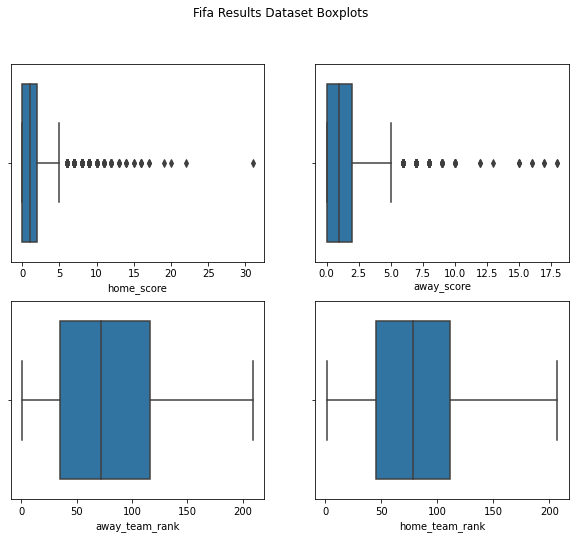

In [145]:
# we plot boxplots to check for outliers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 8))

# Title of chart
fig.suptitle('Fifa Results Dataset Boxplots') 

# Home score boxplot
sns.boxplot(fifa_results_dataset['home_score'], ax=ax1)

#Away score boxplot
sns.boxplot(fifa_results_dataset['away_score'], ax=ax2)

#Home team rank boxplot
sns.boxplot(fifa_results_dataset['home_team_rank'], ax=ax4)

#Away team rank boxplot
sns.boxplot(fifa_results_dataset['away_team_rank'], ax=ax3)

# showing our plot
plt.show()

There are outliers in the home score and away score columns.

These will not be removed since they are expected and normal.

There are no outliers in the away team rank and home team rank columns.

## Univariate Analysis

In [219]:
# previewing dataset
fifa_results_dataset.head(2)


,home_team,home_score,away_team,away_score,date,home_team_rank,away_team_rank,tournament_type
0,Bolivia,3,Uruguay,1,1993-08-08,59.0,22.0,World Cup
7,Brazil,1,Mexico,1,1993-08-08,59.0,14.0,Friendly


In [220]:
# checking columns
fifa_results_dataset.columns

Index(['home_team', 'home_score', 'away_team', 'away_score', 'date',
       'home_team_rank', 'away_team_rank', 'tournament_type'],
      dtype='object')

In [118]:
# checking the minimum and maximum value of away goals

print(fifa_results_dataset['away_score'].min())
print(fifa_results_dataset['away_score'].max())


0
18


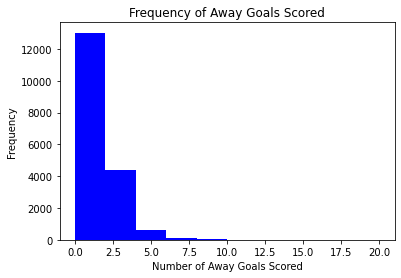

In [113]:
# plotting a histogram to see the distribution of the away goals

plt.hist(fifa_results_dataset['away_score'], bins= [0,2,4,6,8,10,12,14,16,18,20], rwidth = 3, color ='blue')

# Labelling our x axis
plt.xlabel("Number of Away Goals Scored")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Away Goals Scored")

# Displaying our histogram
plt.show()

The away game scores are more distributed on the lower values than on the higher values

In [120]:
# doing a value count to check this
fifa_results_dataset['away_score'].value_counts()

0     7192
1     5829
2     3123
3     1239
4      462
5      179
6       83
7       60
8       25
9       11
10       8
15       3
16       2
12       2
18       2
17       2
13       1
Name: away_score, dtype: int64

In [119]:

# checking the minimum and maximum value of home goals

print(fifa_results_dataset['home_score'].min())
print(fifa_results_dataset['home_score'].max())


0
31


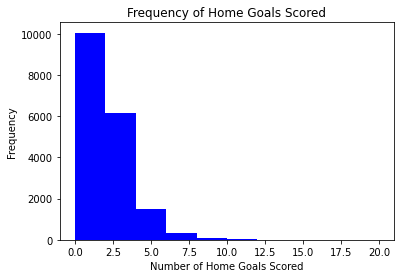

In [117]:
# plotting a histogram to see the distribution of the home goals

plt.hist(fifa_results_dataset['home_score'], bins= [0,2,4,6,8,10,12,14,16,18,20], rwidth = 3, color ='blue')

# Labelling our x axis
plt.xlabel("Number of Home Goals Scored")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Home Goals Scored")

# Displaying our histogram 
plt.show()

In [121]:
# doing a value count of home goals 
fifa_results_dataset['home_score'].value_counts()

1     5363
0     4683
2     4070
3     2101
4     1048
5      454
6      230
7      107
8       72
9       36
10      18
11      12
12      10
13       4
16       4
14       3
17       2
15       2
19       1
20       1
22       1
31       1
Name: home_score, dtype: int64

The home game scores are more distributed on the lower values than on the higher values.

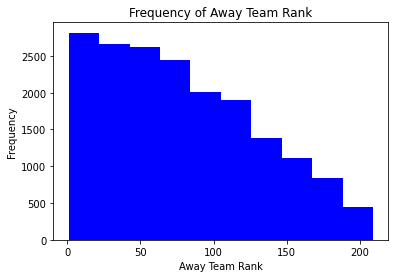

In [124]:
# plotting a histogram to see the distribution of the away_team_rank

plt.hist(fifa_results_dataset['away_team_rank'], bins= 10, rwidth = 3, color ='blue')

# Labelling our x axis
plt.xlabel("Away Team Rank")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Away Team Rank")

# Displaying our chart
plt.show()

# the ranks are more distributed on the lower values than the higher values

In [126]:
# doing a value counts of away team ranks
fifa_results_dataset['away_team_rank'].value_counts()

47.0     191
1.0      172
26.0     164
2.0      158
4.0      152
        ... 
197.0     12
204.0     11
206.0      8
208.0      1
209.0      1
Name: away_team_rank, Length: 209, dtype: int64

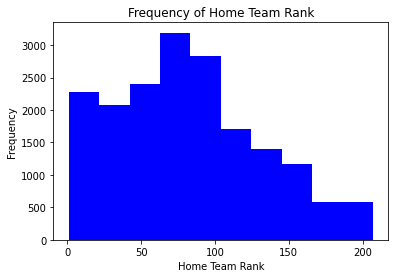

In [127]:
# plotting a histogram to see the distribution of the home_team_rank

plt.hist(fifa_results_dataset['home_team_rank'], bins= 10, rwidth = 3, color ='blue')

# Labelling our x axis
plt.xlabel("Home Team Rank")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Home Team Rank")

# Displaying our chart
plt.show()

# the ranks are more distributed at the central values than the lower or higher values

In [128]:
# doing a value counts of away team ranks
fifa_results_dataset['home_team_rank'].value_counts()

1.0      374
71.0     273
109.0    230
87.0     228
70.0     218
        ... 
198.0      8
175.0      8
194.0      4
206.0      3
207.0      2
Name: home_team_rank, Length: 207, dtype: int64

Measures of central tendency

In [221]:
fifa_results_dataset.columns

Index(['home_team', 'home_score', 'away_team', 'away_score', 'date',
       'home_team_rank', 'away_team_rank', 'tournament_type'],
      dtype='object')

In [146]:
# we will check for the measures of central tendency 

print('Home Team Score Mean is:', round(fifa_results_dataset["home_score"].mean()))
print('Away Team Score Mean is:', round(fifa_results_dataset["away_score"].mean()))
print('Home Team Rank Mean is:', round(fifa_results_dataset["home_team_rank"].mean()))
print('Away Team Rank Mean is:', round(fifa_results_dataset["away_team_rank"].mean()))
print('___________________________________________________')

print('Home Team Score Mode is:', round(fifa_results_dataset["home_score"].mode()))
print('Away Team Score Mode is:', round(fifa_results_dataset["away_score"].mode()))
print('Home Team Rank Mode is:', round(fifa_results_dataset["home_team_rank"].mode()))
print('Away Team Rank Mode is:', round(fifa_results_dataset["away_team_rank"].mode()))
print('___________________________________________________')

print('Home Team Score Median is:', round(fifa_results_dataset["home_score"].median()))
print('Away Team Score Median is:', round(fifa_results_dataset["away_score"].median()))
print('Home Team Rank Median is:', round(fifa_results_dataset["home_team_rank"].median()))
print('Away Team Rank Median is:', round(fifa_results_dataset["away_team_rank"].median()))

Home Team Score Mean is: 2
Away Team Score Mean is: 1
Home Team Rank Mean is: 82
Away Team Rank Mean is: 79
___________________________________________________
Home Team Score Mode is: 0    1
dtype: int64
Away Team Score Mode is: 0    0
dtype: int64
Home Team Rank Mode is: 0    1.0
dtype: float64
Away Team Rank Mode is: 0    47.0
dtype: float64
___________________________________________________
Home Team Score Median is: 1
Away Team Score Median is: 1
Home Team Rank Median is: 78
Away Team Rank Median is: 72


In [140]:
#  we will check for the measures of dispersion

print('Home Team Score Quantiles is:', round(fifa_results_dataset["home_score"].quantile([0.25, 0.5, 0.75])))
print('Away Team Score Quantiles is:', round(fifa_results_dataset["away_score"].quantile([0.25, 0.5, 0.75])))
print('Home Team Rank Quantiles is:', round(fifa_results_dataset["home_team_rank"].quantile([0.25, 0.5, 0.75])))
print('Away Team Rank Quantiles is:', round(fifa_results_dataset["away_team_rank"].quantile([0.25, 0.5, 0.75])))
print('___________________________________________________')

print('Home Team Score Standard Deviation:', round(fifa_results_dataset["home_score"].std()))
print('Away Team Score Standard Deviation:', round(fifa_results_dataset["away_score"].std()))
print('Home Team Rank Standard Deviation is:', round(fifa_results_dataset["home_team_rank"].std()))
print('Away Team Rank Standard Deviation is:', round(fifa_results_dataset["away_team_rank"].std()))
print('___________________________________________________')

print('Home Team Score Kurtosis is:', round(fifa_results_dataset["home_score"].kurt()))
print('Away Team Score Kurtosis is:', round(fifa_results_dataset["away_score"].kurt()))
print('Home Team Rank Kurtosis is:', round(fifa_results_dataset["home_team_rank"].kurt()))
print('Away Team Rank Kurtosis is:', round(fifa_results_dataset["away_team_rank"].kurt()))
print('___________________________________________________')

print('Home Team Score skewness is :', round(fifa_results_dataset["home_score"].skew()))
print('Away Team Score skewness is:', round(fifa_results_dataset["away_score"].skew()))
print('Home Team Rank skewness is:', round(fifa_results_dataset["home_team_rank"].skew()))
print('Away Team Rankskewness is:', round(fifa_results_dataset["away_team_rank"].skew()))



Home Team Score Quantiles is: 0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64
Away Team Score Quantiles is: 0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64
Home Team Rank Quantiles is: 0.25     45.0
0.50     78.0
0.75    111.0
Name: home_team_rank, dtype: float64
Away Team Rank Quantiles is: 0.25     35.0
0.50     72.0
0.75    116.0
Name: away_team_rank, dtype: float64
___________________________________________________
Home Team Score Standard Deviation: 2
Away Team Score Standard Deviation: 1
Home Team Rank Standard Deviation is: 50
Away Team Rank Standard Deviation is: 52
___________________________________________________
Home Team Score Kurtosis is: 14
Away Team Score Kurtosis is: 14
Home Team Rank Kurtosis is: 0
Away Team Rank Kurtosis is: -1
___________________________________________________
Home Team Score skewness is : 2
Away Team Score skewness is: 2
Home Team Rank skewness is: 0
Away Team Rankskewness is: 0


## Bivariate Analysis

In [222]:
# checking columns
fifa_results_dataset.columns

Index(['home_team', 'home_score', 'away_team', 'away_score', 'date',
       'home_team_rank', 'away_team_rank', 'tournament_type'],
      dtype='object')

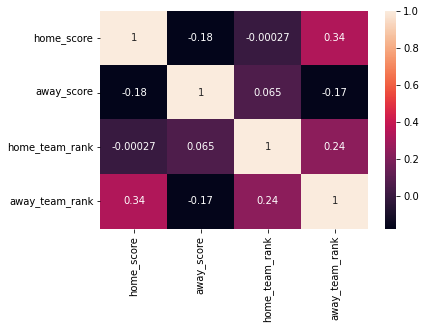

In [223]:
# we plot a correlation matrix to see how our variables relate to each other

sns.heatmap(fifa_results_dataset.corr(), annot=True)
plt.show()

There is a moderate correlation between the away team rank and home score, away team rank and home team rank.

We expected to see a higher correlation between the home team score and home team rank and between away team goal and away team rank which was not seen in the correlation matrix.

The most unrelated features are the types of tournament; with the most uncorrelated being Other and Friendly.

There is no significant relationship between the types of tournament and scores, whether away or home, and ranks.



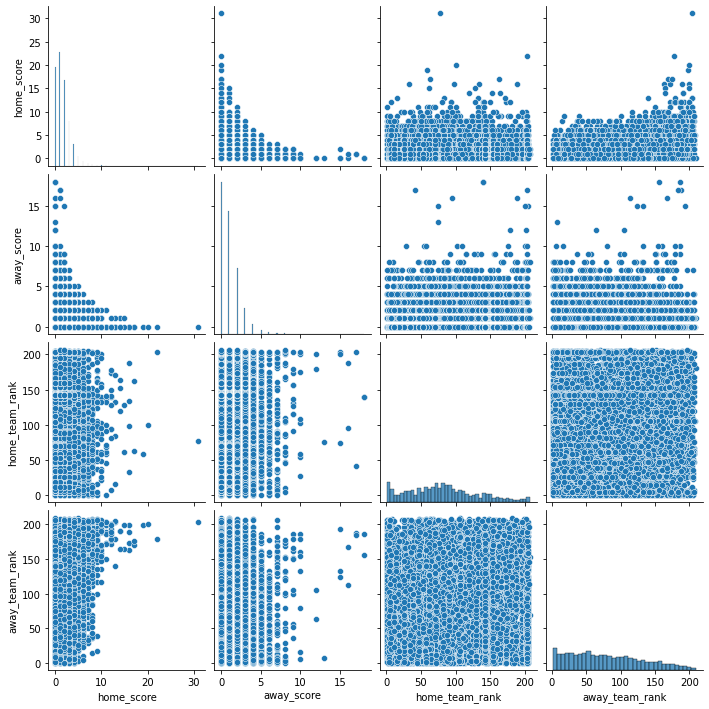

In [224]:
# we plot pairplots to show this correlation

sns.pairplot(fifa_results_dataset)

plt.show()

#Modelling

#Approach 1: Polynomial approach



What to train given:

Rank of home team

Rank of away team

Tournament type

##Model 1: Predict how many goals the home team scores.


##Feature Engineering

Creating new variables to help in prediction

In [218]:
# We create a function that gives a win if the home score is greater than the home score 
# and a loss if the home score is less than the away score
# and a draw if they are equal

def outcome(row):
  if row['home_score'] > row['away_score']:
    outcome = 'Win'
  elif row['home_score'] < row['away_score']:
    outcome = 'Lose'
  else:
    outcome = 'Draw'
  return outcome


In [219]:
# we then create a new variable, column with this function 

fifa_results_dataset['Outcome'] = fifa_results_dataset.apply(outcome, axis=1)

#previewing
fifa_results_dataset.head()

,home_team,home_score,away_team,away_score,date,home_team_rank,away_team_rank,tournament_type,Outcome
0,Bolivia,3,Uruguay,1,1993-08-08,59.0,22.0,World Cup,Win
7,Brazil,1,Mexico,1,1993-08-08,59.0,14.0,Friendly,Draw
14,Ecuador,5,Venezuela,0,1993-08-08,59.0,94.0,World Cup,Win
21,Guinea,1,Sierra Leone,0,1993-08-08,59.0,86.0,Friendly,Win
28,Paraguay,1,Argentina,3,1993-08-08,59.0,5.0,World Cup,Lose


In [221]:
# to proceed with our analysis of either a win, lose or draw,
# we perform label encoding on our numerical features so that they are machine readable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [222]:
# we label encode the categorical data types to numerical datatypes

fifa_results_dataset['home_team'] = label_encoder.fit_transform (fifa_results_dataset['home_team'])
fifa_results_dataset['away_team'] = label_encoder.fit_transform (fifa_results_dataset['away_team'])
fifa_results_dataset['tournament_type'] = label_encoder.fit_transform (fifa_results_dataset['tournament_type'])
fifa_results_dataset['Outcome'] = label_encoder.fit_transform (fifa_results_dataset['Outcome'])


In [223]:
# checking the datatypes

fifa_results_dataset.dtypes

home_team                   int64
home_score                  int64
away_team                   int64
away_score                  int64
date               datetime64[ns]
home_team_rank            float64
away_team_rank            float64
tournament_type             int64
Outcome                     int64
dtype: object

In [224]:
# converting datetime to year
fifa_results_dataset['year'] = fifa_results_dataset.date.dt.year


In [225]:
# checking the columns

fifa_results_dataset.columns

Index(['home_team', 'home_score', 'away_team', 'away_score', 'date',
       'home_team_rank', 'away_team_rank', 'tournament_type', 'Outcome',
       'year'],
      dtype='object')

In [226]:
# deleting date column
fifa_results_dataset.drop('date', inplace = True, axis = 1)



In [227]:
# previewing

fifa_results_dataset.head()

,home_team,home_score,away_team,away_score,home_team_rank,away_team_rank,tournament_type,Outcome,year
0,26,3,184,1,59.0,22.0,2,2,1993
7,30,1,115,1,59.0,14.0,0,0,1993
14,67,5,187,0,59.0,94.0,2,2,1993
21,93,1,155,0,59.0,86.0,0,2,1993
28,168,1,8,3,59.0,5.0,2,1,1993


## Checking multicollinearity

Plot a correlation heatmap

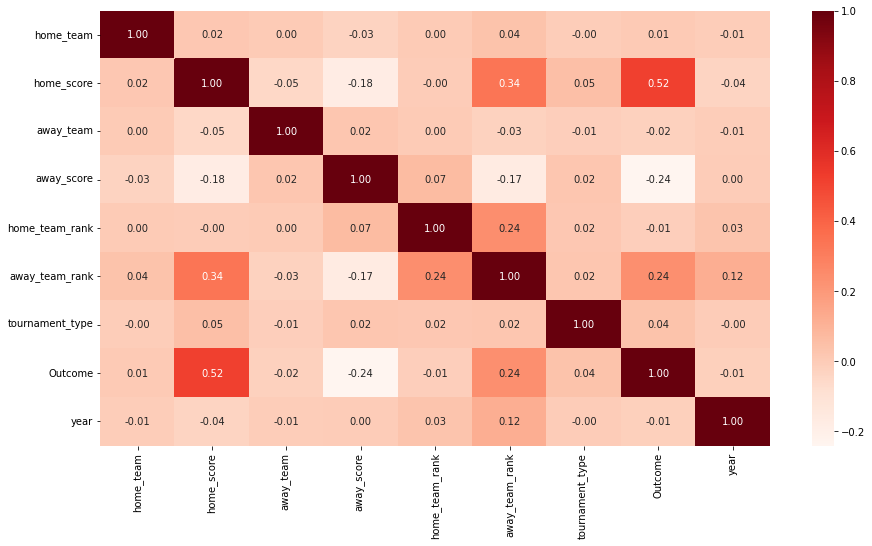

In [236]:
# defining size of our correlation heat map
plt.figure(figsize=(15,8))

#plotting a heatmap
sns.heatmap(fifa_results_dataset.corr(),annot=True,cmap="Reds",fmt=".2f");

# showing our plot
plt.show()

In [228]:
# checking correlation using variance inflation factor, VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Checking multi collinearity using the VIF function

In [229]:
#our dependent variable in this case is home_score
# the independent variables  

b = fifa_results_dataset[['tournament_type','away_score', 'away_team_rank','home_team_rank']]
  
# VIF dataframe
vif_home = pd.DataFrame()
vif_home["feature"] = b.columns
  
# calculating VIF for each feature
vif_home["VIF"] = [variance_inflation_factor(b.values, i)
                          for i in range(len(b.columns))]
  
print(vif_home)

           feature       VIF
0  tournament_type  1.929187
1       away_score  1.550833
2   away_team_rank  2.764664
3   home_team_rank  3.153194


The vif scores are slightly above 1, showing that the variables are moderately correlated.

A low VIF score is suitable for modelling.

A high VIF score, above 5, would show a strong correlation.

### Creating our model

In [239]:
fifa_results_dataset.columns

Index(['home_team', 'home_score', 'away_team', 'away_score', 'home_team_rank',
       'away_team_rank', 'tournament_type', 'Outcome', 'year'],
      dtype='object')

In [231]:
# creating our training and test sets

X = fifa_results_dataset[['home_team', 'away_team','tournament_type','away_score', 'home_team_rank', 'away_team_rank']]
y = fifa_results_dataset['home_score']

In [232]:
#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14578, 6) (3645, 6) (14578,) (3645,)


In [233]:
#Model Selection:
model = PolynomialFeatures(degree = 2)


In [234]:
#Fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)


In [235]:
#Applying Linear Regression:
Home_reg = LinearRegression()

In [236]:
#Fitting X and y:
Home_reg.fit(X_train, y_train)

y_pred = Home_reg.predict(X_test)

## Mean Squared Error

In [237]:
# finding the mean squared error
# this will estimate the accuracy of our model
# a low error shows a good model and a vice versa
# the error changes depending on the degree of the polynomial

# Importing regression and machine learning libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [238]:
# mean square error

print('Mean squared error (MSE): %.3f' % mean_squared_error(y_test, y_pred ))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y_test, y_pred ))

# the error is low hence the model can be tried

Mean squared error (MSE): 2.323
Coefficient  of Determination (R^2): 0.160


##Model 2: Predict how many goals the away team scores.

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


Using VIF score

In [300]:
#our dependent variable in this case is away_score
# the independent variables  

b = fifa_results_dataset[['tournament_type','home_score','home_team_rank']]
  
# VIF dataframe
vif_home = pd.DataFrame()
vif_home["feature"] = b.columns
  
# calculating VIF for each feature
vif_home["VIF"] = [variance_inflation_factor(b.values, i)
                          for i in range(len(b.columns))]
  
print(vif_home)

           feature       VIF
0  tournament_type  1.851162
1       home_score  1.687475
2   home_team_rank  2.008627


The scores are low hence model is fit

In [301]:
# creating our training and test sets
X1 = fifa_results_dataset[['home_team', 'away_team', 'tournament_type', 'home_team_rank']]
y1 = fifa_results_dataset[['away_score']]

In [302]:
# Split the dataset into train and test sets
X1_train, y1_train, X1_test, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state=0)


In [303]:

# previewing the shape
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(14578, 4) (14578, 1) (3645, 4) (3645, 1)


In [304]:
#Model Selection:
model = PolynomialFeatures(degree = 3)


In [305]:
#Fitting the model:
X1_train = model.fit_transform(X1_train)
X1_test = model.fit_transform(X1_test)

In [306]:
#Applying Linear Regression:
Away_Reg = LinearRegression()


In [310]:
#Fitting X and y:
Away_Reg.fit(X1_train, y1_train)

y1_pred = Away_reg.predict(X1_test)

In [254]:
# mean squared error for away score
print('Mean squared error (MSE): %.3f' % mean_squared_error(y_test, y_pred ))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y_test, y_pred ))


Mean squared error (MSE): 2.312
Coefficient  of Determination (R^2): 0.164


The errors are low hence the model is good


####Logistic regression

In [313]:
# testing multicollinearity of the independent variables set

b = fifa_results_dataset[['home_team', 'away_team', 'home_score', 'away_score', 'tournament_type', 'home_team_rank', 'away_team_rank']]
  
# VIF dataframe
fifa_results_vif= pd.DataFrame()
fifa_results_vif["feature"] = b.columns
  
# calculating VIF for each feature
fifa_results_vif["VIF"] = [variance_inflation_factor(b.values, i)
                          for i in range(len(b.columns))]
  
print(fifa_results_vif)

           feature       VIF
0        home_team  3.258626
1        away_team  3.223905
2       home_score  2.197901
3       away_score  1.663614
4  tournament_type  2.121578
5   home_team_rank  3.533975
6   away_team_rank  3.774672


In [314]:
fifa_results_dataset.columns

Index(['home_team', 'home_score', 'away_team', 'away_score', 'home_team_rank',
       'away_team_rank', 'tournament_type', 'Outcome', 'year'],
      dtype='object')

In [316]:
# Splitting our dataset
#
X = fifa_results_dataset.drop(['Outcome'] ,axis=1)
y = fifa_results_dataset['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [317]:
# Fitting 

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [318]:
# predicting

y_pred = LogReg.predict(X_test)

In [319]:
# Evaluating the model

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 875,   45,  328],
       [ 279, 1227,    0],
       [ 154,    0, 2559]])

In [320]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.8525699652460216


Our model was close to being accurate 

#Conclusion

Logistic regression was the best for this prediction

#Follow up questions


###a). Did we have the right data?


#####We had the right data


###b). Do we need other data to answer our question?


#####It would have been good if there would have been records of FIFA ranking  from before 1993.

###c). Did we have the right question?


#####We had the right question.